In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv(r'C:\Users\91916\Desktop\VARUN\python_guvi\guvi\Datasets\synthetic_sensor_data.csv')

In [3]:
df

,Timestamp,Temperature,Anomaly,Location
0,2024-06-01 19:50:28,24.476332,0,SensorB
1,2024-06-01 19:50:28,18.253966,0,SensorA
2,2024-06-01 19:50:28,14.953520,0,SensorB
3,2024-06-01 19:50:28,17.667181,0,SensorA
4,2024-06-01 19:50:28,17.079826,0,SensorA
...,...,...,...,...
9995,2024-06-01 19:50:29,26.460733,0,SensorA
9996,2024-06-01 19:50:29,22.027875,0,NaN
9997,2024-06-01 19:50:29,17.917821,0,SensorA
9998,2024-06-01 19:50:29,23.730639,0,SensorB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    10000 non-null  object 
 1   Temperature  10000 non-null  float64
 2   Anomaly      10000 non-null  int64  
 3   Location     6704 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


In [5]:
df.isnull().sum()

Timestamp         0
Temperature       0
Anomaly           0
Location       3296
dtype: int64

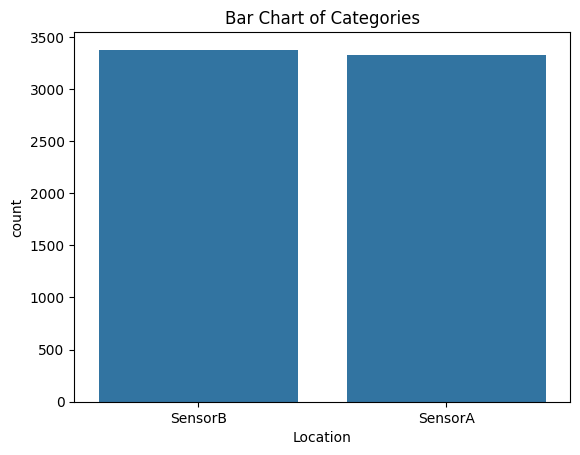

In [6]:
sns.countplot(x='Location', data=df)
plt.title('Bar Chart of Categories')
plt.xlabel('Location')
plt.show()

In [7]:
df['Location'].value_counts()

Location
SensorB    3377
SensorA    3327
Name: count, dtype: int64

In [8]:
# Step 1: Identify the column with null values
null_column = 'Location'

# Step 2: Generate random choices to fill null values
# Define the two types of data you want to use
choices = ['SensorA', 'SensorB']

# Generate random choices for the number of null values
random_choices = np.random.choice(choices, size=df[null_column].isnull().sum())

# Step 3: Fill the null values with the random choices
df.loc[df[null_column].isnull(), null_column] = random_choices

print("\nDataFrame after filling null values randomly with two types of data:")
df



DataFrame after filling null values randomly with two types of data:


,Timestamp,Temperature,Anomaly,Location
0,2024-06-01 19:50:28,24.476332,0,SensorB
1,2024-06-01 19:50:28,18.253966,0,SensorA
2,2024-06-01 19:50:28,14.953520,0,SensorB
3,2024-06-01 19:50:28,17.667181,0,SensorA
4,2024-06-01 19:50:28,17.079826,0,SensorA
...,...,...,...,...
9995,2024-06-01 19:50:29,26.460733,0,SensorA
9996,2024-06-01 19:50:29,22.027875,0,SensorB
9997,2024-06-01 19:50:29,17.917821,0,SensorA
9998,2024-06-01 19:50:29,23.730639,0,SensorB


In [9]:
df.isnull().sum()

Timestamp      0
Temperature    0
Anomaly        0
Location       0
dtype: int64

In [10]:
df['Timestamp'].unique()

array(['2024-06-01 19:50:28', '2024-06-01 19:50:29'], dtype=object)

In [11]:
df.Timestamp.value_counts()

Timestamp
2024-06-01 19:50:29    9802
2024-06-01 19:50:28     198
Name: count, dtype: int64

In [12]:
df1 = df.copy()
df1

,Timestamp,Temperature,Anomaly,Location
0,2024-06-01 19:50:28,24.476332,0,SensorB
1,2024-06-01 19:50:28,18.253966,0,SensorA
2,2024-06-01 19:50:28,14.953520,0,SensorB
3,2024-06-01 19:50:28,17.667181,0,SensorA
4,2024-06-01 19:50:28,17.079826,0,SensorA
...,...,...,...,...
9995,2024-06-01 19:50:29,26.460733,0,SensorA
9996,2024-06-01 19:50:29,22.027875,0,SensorB
9997,2024-06-01 19:50:29,17.917821,0,SensorA
9998,2024-06-01 19:50:29,23.730639,0,SensorB


In [13]:
df1['Location'].unique()

array(['SensorB', 'SensorA'], dtype=object)

In [14]:
mapping = {'SensorA' : 1, 'SensorB' : 2}
df1.replace({'Location': mapping}, inplace=True)

C:\Users\91916\AppData\Local\Temp\ipykernel_6072\1597315381.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Location': mapping}, inplace=True)


In [15]:
df1['Location'].unique()

array([2, 1], dtype=int64)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    10000 non-null  object 
 1   Temperature  10000 non-null  float64
 2   Anomaly      10000 non-null  int64  
 3   Location     10000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [17]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    10000 non-null  datetime64[ns]
 1   Temperature  10000 non-null  float64       
 2   Anomaly      10000 non-null  int64         
 3   Location     10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 312.6 KB


In [19]:
df1['date_day'] = df1['Timestamp'].dt.day
df1['date_month'] = df1['Timestamp'].dt.month
df1['date_year'] = df1['Timestamp'].dt.year
df1['date_hour'] = df1['Timestamp'].dt.hour
df1['date_minute'] = df1['Timestamp'].dt.minute
df1['date_seconds'] = df1['Timestamp'].dt.second

In [21]:
df2 = df1.copy()

In [23]:
df2.drop(columns=['Timestamp'], inplace=True)

In [24]:
df2

,Temperature,Anomaly,Location,date_day,date_month,date_year,date_hour,date_minute,date_seconds
0,24.476332,0,2,1,6,2024,19,50,28
1,18.253966,0,1,1,6,2024,19,50,28
2,14.953520,0,2,1,6,2024,19,50,28
3,17.667181,0,1,1,6,2024,19,50,28
4,17.079826,0,1,1,6,2024,19,50,28
...,...,...,...,...,...,...,...,...,...
9995,26.460733,0,1,1,6,2024,19,50,29
9996,22.027875,0,2,1,6,2024,19,50,29
9997,17.917821,0,1,1,6,2024,19,50,29
9998,23.730639,0,2,1,6,2024,19,50,29


In [25]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

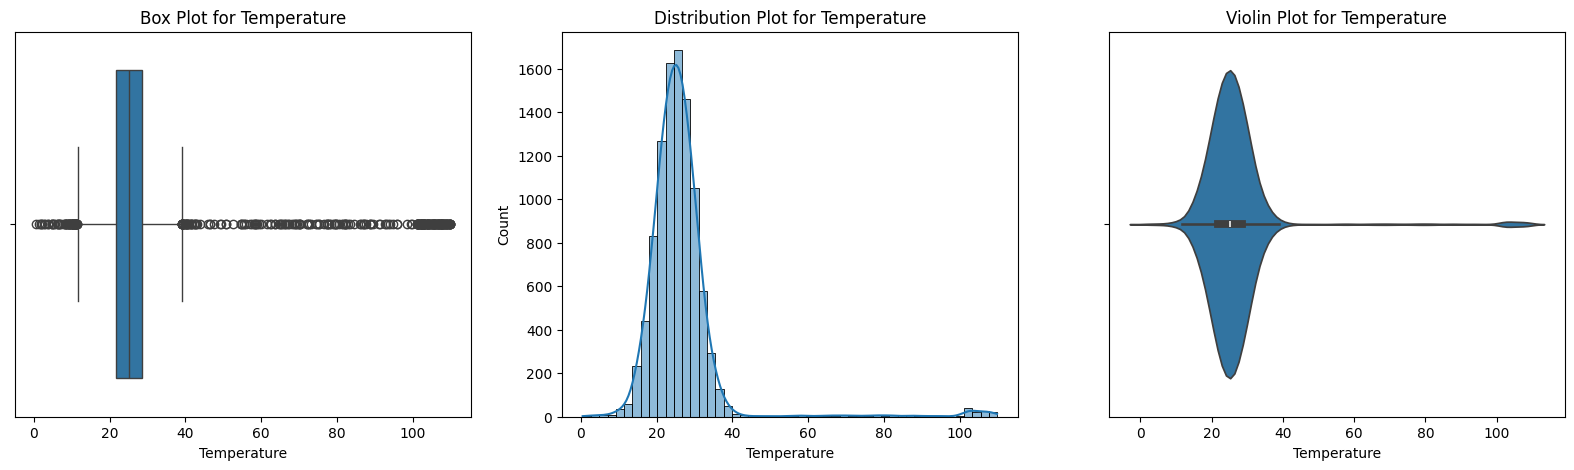

In [28]:
for i in ['Temperature']:
    plot(df2, i)

In [29]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [34]:
outlier(df2,'Temperature')
df2

,Temperature,Anomaly,Location,date_day,date_month,date_year,date_hour,date_minute,date_seconds
0,24.476332,0,2,1,6,2024,19,50,28
1,18.253966,0,1,1,6,2024,19,50,28
2,14.953520,0,2,1,6,2024,19,50,28
3,17.667181,0,1,1,6,2024,19,50,28
4,17.079826,0,1,1,6,2024,19,50,28
...,...,...,...,...,...,...,...,...,...
9995,26.460733,0,1,1,6,2024,19,50,29
9996,22.027875,0,2,1,6,2024,19,50,29
9997,17.917821,0,1,1,6,2024,19,50,29
9998,23.730639,0,2,1,6,2024,19,50,29


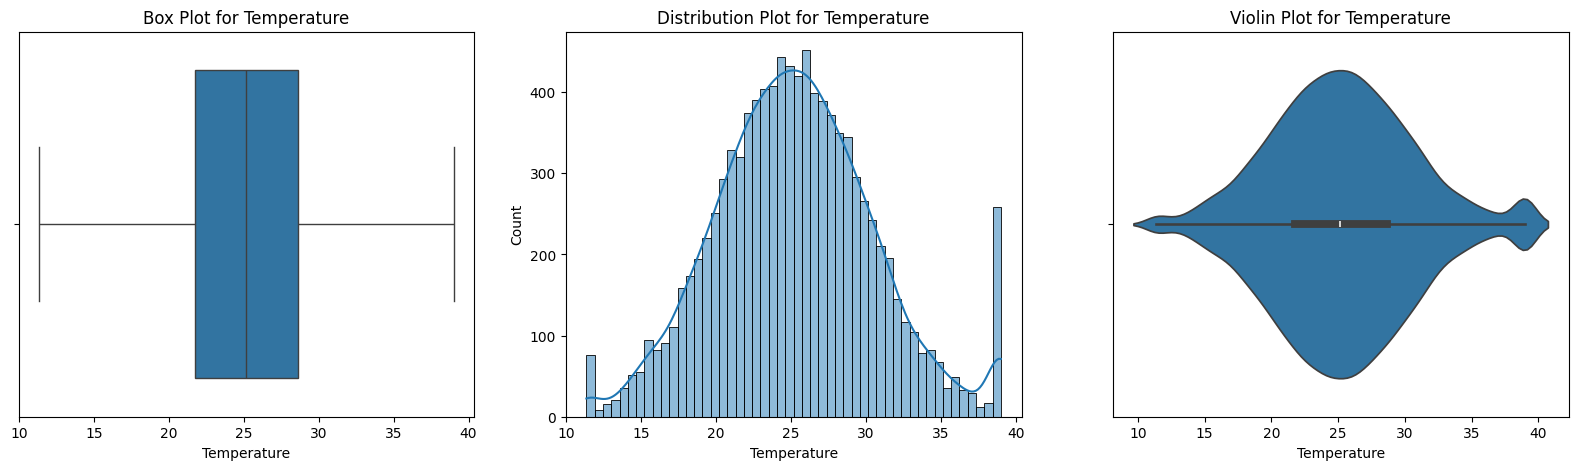

In [35]:
for i in ['Temperature']:
    plot(df2, i)

In [36]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,10000.0,25.302077,5.356560,11.368729,21.736465,25.152475,28.648289,39.016025
Anomaly,10000.0,0.022900,0.149592,0.000000,0.000000,0.000000,0.000000,1.000000
Location,10000.0,1.505700,0.499993,1.000000,1.000000,2.000000,2.000000,2.000000
date_day,10000.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
date_month,10000.0,6.000000,0.000000,6.000000,6.000000,6.000000,6.000000,6.000000
date_year,10000.0,2024.000000,0.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
date_hour,10000.0,19.000000,0.000000,19.000000,19.000000,19.000000,19.000000,19.000000
date_minute,10000.0,50.000000,0.000000,50.000000,50.000000,50.000000,50.000000,50.000000
date_seconds,10000.0,28.980200,0.139319,28.000000,29.000000,29.000000,29.000000,29.000000


In [37]:
df2.dtypes

Temperature     float64
Anomaly           int64
Location          int64
date_day          int32
date_month        int32
date_year         int32
date_hour         int32
date_minute       int32
date_seconds      int32
dtype: object

<Axes: >

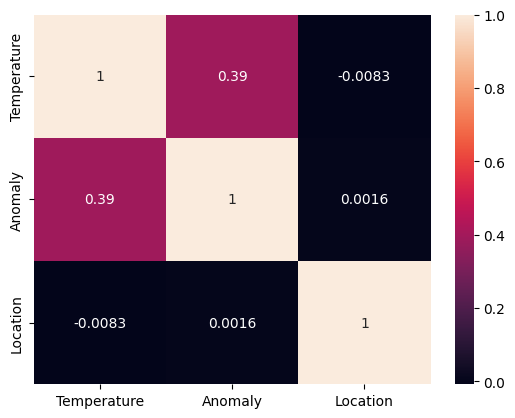

In [39]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['Temperature','Anomaly','Location']
df_heatmap = df2[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [40]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

In [41]:
df2.Anomaly.value_counts()

Anomaly
0    9771
1     229
Name: count, dtype: int64

In [42]:
X = df2.drop('Anomaly', axis=1)
y = df2['Anomaly']

In [43]:
#Balancing the dataset using smoteENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [44]:
X.shape, y.shape, X_resampled.shape, y_resampled.shape

((10000, 8), (10000,), (19522, 8), (19522,))

In [79]:
# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(X,y, algorithm):

    model_2 = algorithm().fit(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    y_pred_train = model_2.predict(X_train)
    y_pred_test = model_2.predict(X_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [80]:
print(machine_learning_classification(X_resampled,y_resampled, DecisionTreeClassifier))
print(machine_learning_classification(X_resampled,y_resampled, ExtraTreesClassifier))
print(machine_learning_classification(X_resampled,y_resampled, RandomForestClassifier))
print(machine_learning_classification(X_resampled,y_resampled, AdaBoostClassifier))
print(machine_learning_classification(X_resampled,y_resampled, GradientBoostingClassifier))
print(machine_learning_classification(X_resampled,y_resampled, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}


C:\Users\91916\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9983168679107208, 'accuracy_test': 0.9974389619259006}


In [53]:
#Gridsearch for XGB classifier
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [54]:
# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best accuracy score:  0.9978777899743871


In [55]:
# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

Test set accuracy:  0.9974389619259006


In [81]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

model_2 = XGBClassifier(colsample_bytree= 0.8, gamma=0, learning_rate=0.01, max_depth= 3, min_child_weight=1, n_estimators= 50, subsample= 0.8).fit(X_train, y_train)
y_pred_train = model_2.predict(X_train)
y_pred_test = model_2.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9980241492864984, 0.9974389619259006)

In [82]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# predict the status and check the accuracy using metrics

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

model_2 = XGBClassifier(colsample_bytree= 0.8, gamma=0, learning_rate=0.01, max_depth= 3, min_child_weight=1, n_estimators= 50, subsample= 0.8).fit(X_train, y_train)
y_pred = model_2.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2939
           1       0.99      1.00      1.00      2918

    accuracy                           1.00      5857
   macro avg       1.00      1.00      1.00      5857
weighted avg       1.00      1.00      1.00      5857

[[2924   15]
 [   0 2918]]


In [83]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9974481116025858


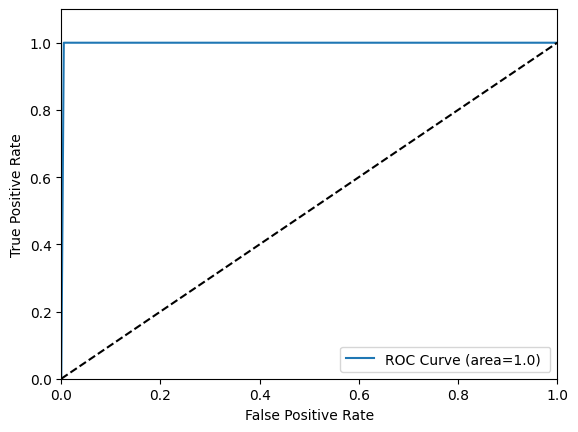

In [84]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [85]:
# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[37,1,1,6,2025,19,50,30]])
y_p = model_2.predict(user_data)
if y_p[0] == 1:
    print('1')
else:
    print('0')

0


In [86]:
# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[50,1,1,6,2025,19,50,28]])
y_p = model_2.predict(user_data)
if y_p[0] == 1:
    print('1')
else:
    print('0')

1


In [87]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_2, X_resampled,y_resampled, cv=5, scoring='accuracy')
print(cv_scores)
print(f"Cross-validation accuracy: {cv_scores.mean()}")

[0.99590269 0.99795134 0.99846311 0.99820697 0.99923156]
Cross-validation accuracy: 0.9979511345269831


In [88]:
# save the classification model by using pickle

import pickle

with open('classification_model_anamoly.pkl', 'wb') as h:
    pickle.dump(model_2, h)

In [90]:
# load the pickle model to predict the anamoly

with open(r'C:\Users\91916\GUVI_DS\classification_model_anamoly.pkl', 'rb') as h:
    model_2 = pickle.load(h)

y_pred = model_2.predict(np.array([[50,1,1,6,2025,19,50,28]]))
y_pred[0]

1

In [91]:
# load the pickle model to predict the anamoly

with open(r'C:\Users\91916\GUVI_DS\classification_model_anamoly.pkl', 'rb') as h:
    model_2 = pickle.load(h)

y_pred = model_2.predict(np.array([[30,1,1,6,2025,19,50,28]]))
y_pred[0]

0